<a href="https://colab.research.google.com/github/Sree-13/22-07-2023_dataset/blob/main/GOLD_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PREPROCESSING

In [60]:
data = pd.read_csv("/content/gld_price_data.csv")
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [61]:
data.shape

(2290, 6)

In [62]:
#checking the first 5 values of the dataset
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [63]:
#checking the last 5 values of the dataset
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [64]:
#knowing the basic info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [65]:
#finding if there is any null values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [66]:
#Getting the measures of the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


# **CORREALATION**

In [67]:
corr=data.corr()
corr

<ipython-input-67-0d3ae1d0be10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

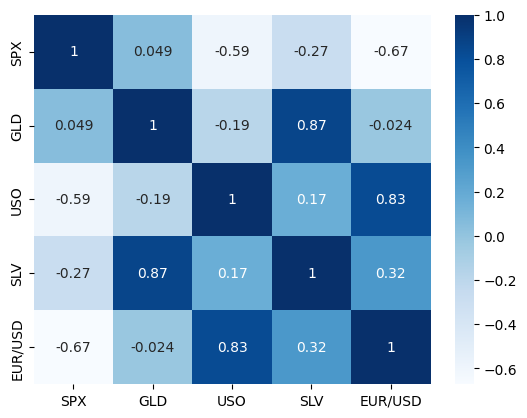

In [68]:
sns.heatmap(corr, annot = True , cmap = "Blues")

In [69]:
#correlation values of gold
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-70-b18e0b15a8a3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'] , color = 'Green')


<Axes: xlabel='GLD', ylabel='Density'>

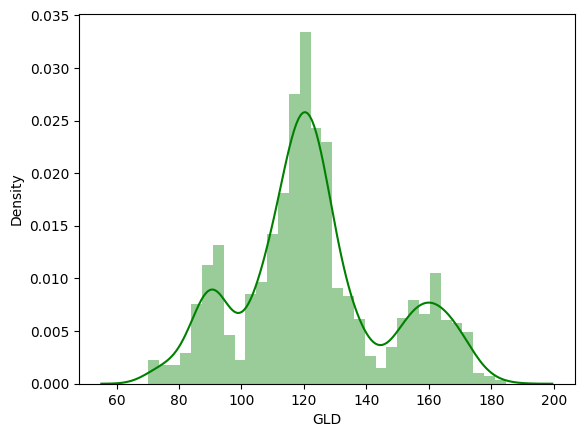

In [70]:
#checking the distribution of gold
sns.distplot(data['GLD'] , color = 'Green')

# **SPLITTING FEATURE AND TARGET**

In [71]:
X = data.drop(['Date','GLD'], axis = 1)
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [72]:
Y = data["GLD"]
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# **SPLITTING INTO TESTING AND TRAINING DATA**

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2 , random_state = 2)

# **MODEL TRAINING**
**RANDOM FOREST**

In [74]:
regression = RandomForestRegressor(n_estimators = 100)

In [75]:
#training model
regression.fit(X_train,Y_train)

RandomForestRegressor()

MODEL EVALUATION

In [76]:
#prediction on test data
test_data_prediction = regression.predict(X_test)

In [77]:
print(test_data_prediction)

[168.58769933  82.07839989 116.03830041 127.6608006  120.90790087
 154.68889767 150.39639795 126.30620012 117.35789892 126.03090034
 116.85800091 171.56310105 141.47859827 167.93909832 114.92900018
 117.63110015 137.27620253 169.82020041 159.70290295 158.67729955
 155.09779989 125.20129967 175.68079906 157.67300264 125.1559006
  93.99039983  76.85710027 120.68580019 119.08729926 167.37619993
  88.2929007  125.39459982  91.04720075 117.71979993 121.04469896
 136.20960072 115.55620132 115.1171006  146.91629978 106.92860113
 103.8670022   87.24709778 126.51430046 118.15739976 153.34409931
 119.63750001 108.44459945 107.95249822  93.22000046 127.02929813
  75.15400047 113.70279907 121.34859979 111.27489876 119.00689893
 120.85059938 158.86020057 166.98430083 146.96089657  86.12419886
  94.36660042  86.72759865  90.6710004  119.00880058 126.44540122
 127.68339963 170.44159999 122.26249902 117.58159895  98.67960029
 168.28470123 143.4254989  132.3884029  121.17170247 121.41649927
 119.574300

In [78]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R sqaured error: ", error_score)

R sqaured error:  0.9894470991422256


# **COMPARING ACTUAL VALUE WITH PREDICTED VALUE**

In [79]:
Y_test = list(Y_test)

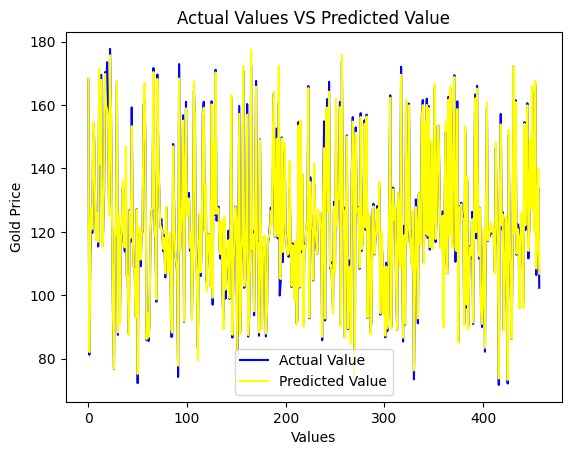

In [80]:
plt.plot(Y_test , color = "Blue" , label = "Actual Value")
plt.plot(test_data_prediction , color = "Yellow" , label = "Predicted Value")
plt.title("Actual Values VS Predicted Value")
plt.xlabel("Values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

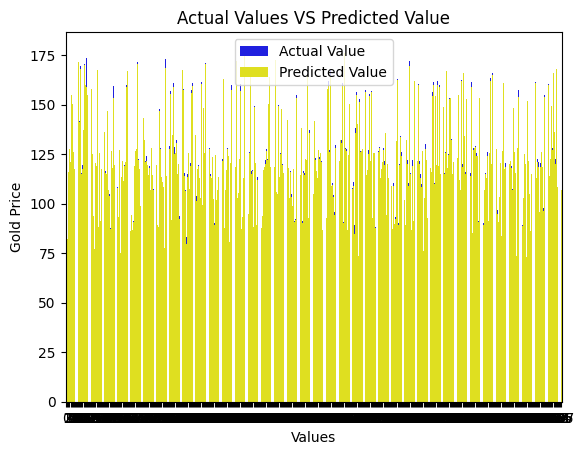

In [81]:
sns.barplot(Y_test , color = "Blue" , label = "Actual Value")
sns.barplot(test_data_prediction , color = "Yellow" , label = "Predicted Value")
plt.title("Actual Values VS Predicted Value")
plt.xlabel("Values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()